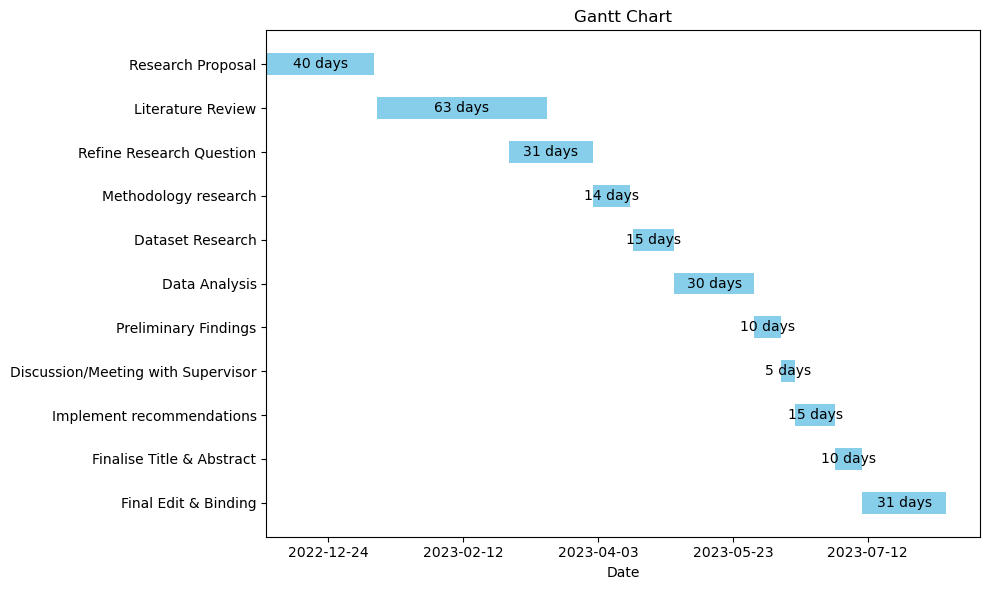

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

df = pd.DataFrame([
    dict(Task="Final Edit & Binding", Start='2023-07-10', Finish='2023-08-10'),
    dict(Task="Finalise Title & Abstract", Start='2023-06-30', Finish='2023-07-10'),
    dict(Task="Implement recommendations", Start='2023-06-15', Finish='2023-06-30'),
    dict(Task="Discussion/Meeting with Supervisor", Start='2023-06-10', Finish='2023-06-15'),
    dict(Task="Preliminary Findings", Start='2023-05-31', Finish='2023-06-10'),
    dict(Task="Data Analysis", Start='2023-05-01', Finish='2023-05-31'),
    dict(Task="Dataset Research", Start='2023-04-16', Finish='2023-05-01'),
    dict(Task="Methodology research", Start='2023-04-01', Finish='2023-04-15'),
    dict(Task="Refine Research Question", Start='2023-03-01', Finish='2023-04-01'),
    dict(Task="Literature Review", Start='2023-01-11', Finish='2023-03-15'),
    dict(Task="Research Proposal", Start='2022-12-01', Finish='2023-01-10')
])

df[["Start", "Finish"]] = df[["Start", "Finish"]].apply(pd.to_datetime)

fig, ax = plt.subplots(figsize=(10, 6))

# Set the date format for x-axis ticks
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Set y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df["Task"])

# Plot the Gantt chart bars
for i, row in df.iterrows():
    task = row["Task"]
    start = row["Start"]
    finish = row["Finish"]
    duration = finish - start
    ax.barh(i, duration, left=start, height=0.5, align="center", color="skyblue")
    ax.text(start + duration / 2, i, f"{duration.days} days", ha="center", va="center")

# Set the chart title and labels
ax.set_title("Gantt Chart")
ax.set_xlabel("Date")

plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
from bokeh.plotting import figure, save
from bokeh.models import HoverTool, Span
from bokeh.palettes import Category20

df = pd.DataFrame([
    dict(Task="Final Edit & Binding", Start='2023-07-10', Finish='2023-08-10'),
    dict(Task="Finalise Title & Abstract", Start='2023-06-30', Finish='2023-07-10'),
    dict(Task="Implement recommendations", Start='2023-06-15', Finish='2023-06-30'),
    dict(Task="Discussion/Meeting with Supervisor", Start='2023-06-10', Finish='2023-06-15'),
    dict(Task="Preliminary Findings", Start='2023-05-31', Finish='2023-06-10'),
    dict(Task="Data Analysis", Start='2023-05-01', Finish='2023-05-31'),
    dict(Task="Dataset Research", Start='2023-04-16', Finish='2023-05-01'),
    dict(Task="Methodology research", Start='2023-04-01', Finish='2023-04-15'),
    dict(Task="Refine Research Question", Start='2023-03-01', Finish='2023-04-01'),
    dict(Task="Literature Review", Start='2023-01-11', Finish='2023-03-15'),
    dict(Task="Research Proposal", Start='2022-12-01', Finish='2023-01-10')
])

df[["Start", "Finish"]] = df[["Start", "Finish"]].apply(pd.to_datetime)

# Create the figure
p = figure(title="Pratik Barve - MSc Data Science Thesis Timeline", x_axis_type="datetime", y_range=df["Task"], height=500, tools="hover", sizing_mode="stretch_both")

# Plot the Gantt chart bars
p.hbar(y=df["Task"], left=df["Start"], right=df["Finish"], height=0.8, color=Category20[len(df)], alpha=0.8)

# Add hover tool to display task details
hover = HoverTool(tooltips=[("Task", "@Task"), ("Start", "@left{%F}"), ("Finish", "@right{%F}")],
                  formatters={"@left": "datetime", "@right": "datetime"})

p.add_tools(hover)

# Add vertical line for current date
current_date = Span(location=pd.to_datetime("today"), dimension="height", line_color="red", line_dash="dashed", line_width=2)
p.add_layout(current_date)

# Set plot attributes
p.ygrid.grid_line_color = None
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Task"

# Increase font size of axis labels
p.xaxis.axis_label_text_font_size = "16pt"
p.yaxis.axis_label_text_font_size = "16pt"

# Increase font size of hover tooltips
hover.tooltips = [("Task", "@Task{font_size='14pt'}"), ("Start", "@left{%F}"), ("Finish", "@right{%F}")]

# Save the interactive Gantt chart as an HTML file
save(p, "index.html")

# Show the interactive Gantt chart
show(p)

/var/folders/55/j0v2zlbn1575rkmztsycxlfw0000gn/T/ipykernel_1517/3216367002.py:51: UserWarning:

save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN

/var/folders/55/j0v2zlbn1575rkmztsycxlfw0000gn/T/ipykernel_1517/3216367002.py:51: UserWarning:

save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'



In [35]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame([
    dict(Task="Final Edit & Binding", Start='2023-07-10', Finish='2023-08-10'),
    dict(Task="Finalise Title & Abstract", Start='2023-06-30', Finish='2023-07-10'),
    dict(Task="Implement recommendations", Start='2023-06-15', Finish='2023-06-30'),
    dict(Task="Discussion/Meeting with Supervisor", Start='2023-06-10', Finish='2023-06-15'),
    dict(Task="Preliminary Findings", Start='2023-05-31', Finish='2023-06-10'),
    dict(Task="Data Analysis", Start='2023-05-01', Finish='2023-05-31'),
    dict(Task="Dataset Research", Start='2023-04-16', Finish='2023-05-01'),
    dict(Task="Methodology research", Start='2023-04-01', Finish='2023-04-15'),
    dict(Task="Refine Research Question", Start='2023-03-01', Finish='2023-04-01'),
    dict(Task="Literature Review", Start='2023-01-11', Finish='2023-03-15'),
    dict(Task="Research Proposal", Start='2022-12-01', Finish='2023-01-10')
])

df[["Start", "Finish"]] = df[["Start", "Finish"]].apply(pd.to_datetime)

# Add duration column
df["Duration"] = df["Finish"] - df["Start"]

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", color="Duration",
                  title="Interactive Gantt Chart", labels={"x": "Date"})

# Update layout
fig.update_layout(xaxis=dict(type="date"), yaxis=dict(autorange="reversed"))

# Save as HTML
fig.write_html("gantt_chart.html")


TypeError: Object of type timedelta is not JSON serializable

In [36]:
!pip install pygal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.4 MB/s eta 0:00:00a 0:00:01


In [43]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib_venn.timeline import timeline

df = pd.DataFrame([
    dict(Task="Final Edit & Binding", Start='2023-07-10', Finish='2023-08-10'),
    dict(Task="Finalise Title & Abstract", Start='2023-06-30', Finish='2023-07-10'),
    dict(Task="Implement recommendations", Start='2023-06-15', Finish='2023-06-30'),
    dict(Task="Discussion/Meeting with Supervisor", Start='2023-06-10', Finish='2023-06-15'),
    dict(Task="Preliminary Findings", Start='2023-05-31', Finish='2023-06-10'),
    dict(Task="Data Analysis", Start='2023-05-01', Finish='2023-05-31'),
    dict(Task="Dataset Research", Start='2023-04-16', Finish='2023-05-01'),
    dict(Task="Methodology research", Start='2023-04-01', Finish='2023-04-15'),
    dict(Task="Refine Research Question", Start='2023-03-01', Finish='2023-04-01'),
    dict(Task="Literature Review", Start='2023-01-11', Finish='2023-03-15'),
    dict(Task="Research Proposal", Start='2022-12-01', Finish='2023-01-10')
])

df[["Start", "Finish"]] = df[["Start", "Finish"]].apply(pd.to_datetime)

fig, ax = plt.subplots(figsize=(10, 6))

# Set the date format for x-axis ticks
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Plot the Gantt chart using timeline function
timeline(ax, tasks=df["Task"], start_dates=df["Start"], end_dates=df["Finish"])

# Set the chart title and labels
ax.set_title("Gantt Chart")
ax.set_xlabel("Date")
ax.set_ylabel("Task")

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib_venn'

In [44]:
!pip install matplotlib-venn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=32999 sha256=9e33c8838a9213b2f757a5e0f6bd97767c8c6db82caa451102c73d101974826a
  Stored in directory: /Users/pratik/Library/Caches/pip/wheels/f6/80/48/193eff32ed8e176623b15874055438ecec522ba68ed05abee6
Successfully built matplotlib-venn
